In [53]:
from frc3223_azurite.data import read_csv, show_data, sg_smooth
from matplotlib import pyplot as plt

from scipy import stats
import numpy

def velocities(ts, xs):
    vs = numpy.zeros(shape=ts.shape, dtype=ts.dtype)
    vs[1:] = (xs[1:] - xs[:-1]) / (ts[1:] - ts[:-1])
    return vs

def process(fnom, s, e):
    data = read_csv(fnom)
    ts = data['time'][s:e]
    voltageb = data['voltage'][s:e]
    voltagep = data['voltagep_motor'][s:e]
    pos = data['enc_pos'][s:e]
    voltage = voltageb * voltagep
    vel = velocities(ts, pos)

    plt.plot(ts[1:], vel[1:])
    plt.show()
    plt.plot(ts, voltage)
    plt.show()
    print(vel[1:].mean())
    print(voltage.mean())

s_t=11 -> s=91
e_t=13 -> e=114


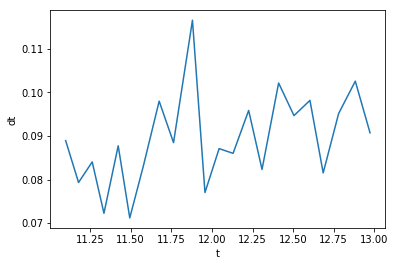

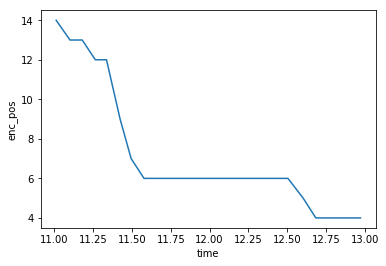

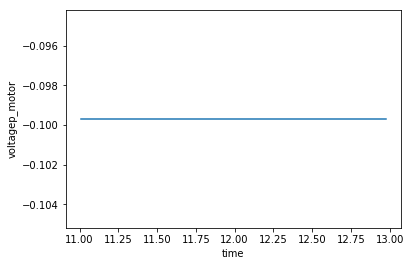

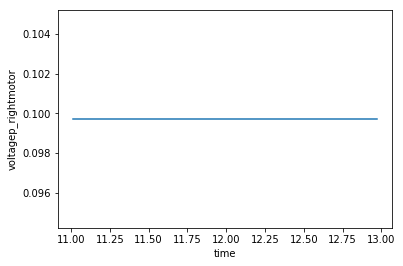

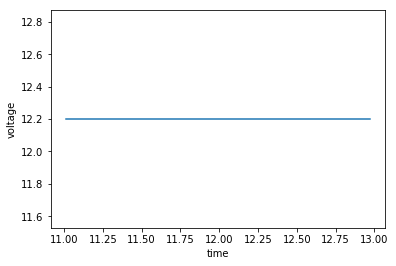

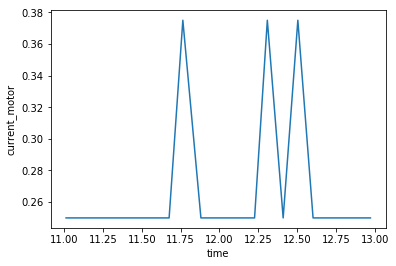

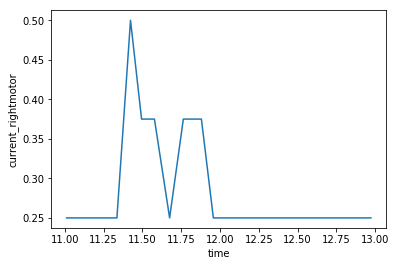

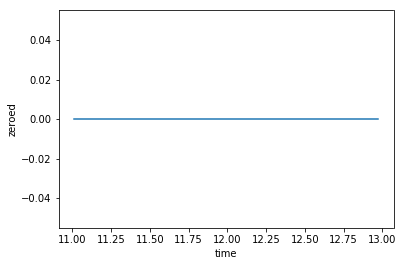

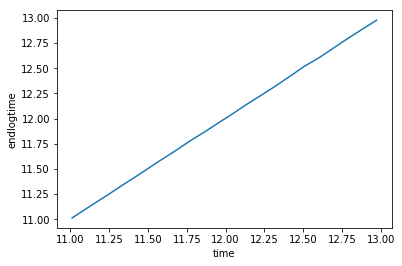

In [59]:

show_data("elevator2.csv", time_key ='time', e_t=13, s_t=11)

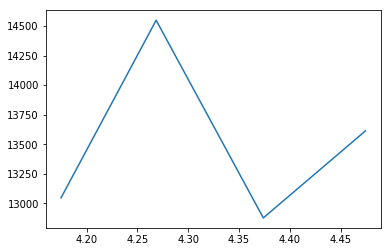

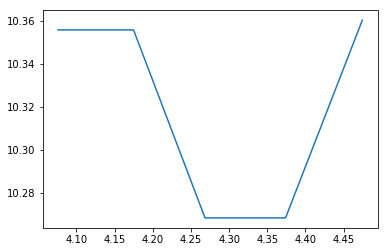

13521.03218568226
10.321661779081134


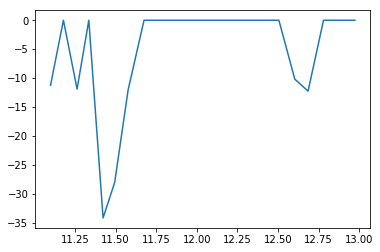

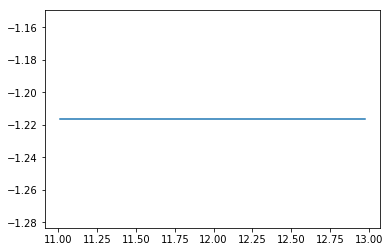

-5.451936204181836
-1.216422287390029


In [20]:
process('elevator2.csv', 17, 22)
process('elevator2.csv', 91, 114)

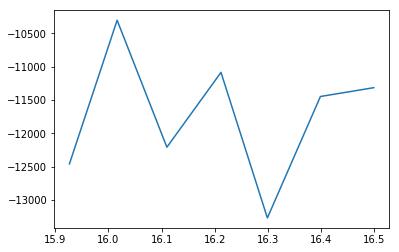

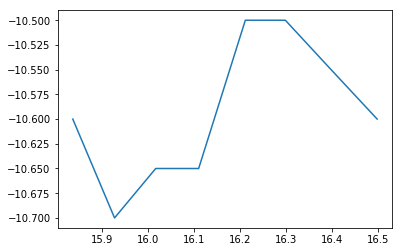

-11728.452814960732
-10.59375


In [52]:
process('elevator3.csv', 140, 148)

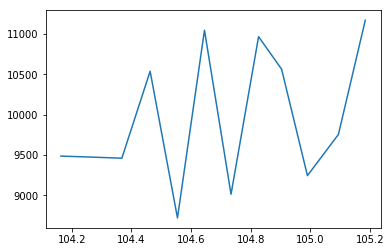

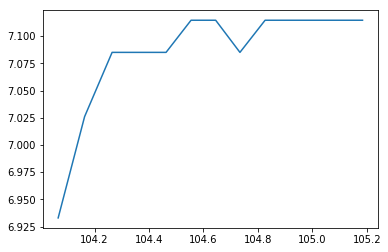

9953.797156325174
7.084698097601323


In [30]:
process("elevator4.csv",s=248, e=261)

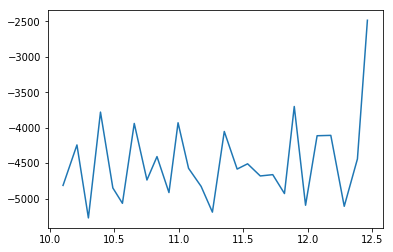

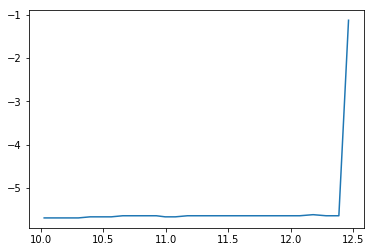

-4482.819450758307
-5.4938311688311705


In [38]:
process("../datapull2/elevator-1528844785.csv", 34, 62)

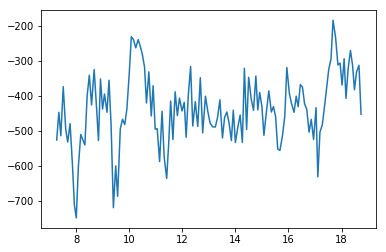

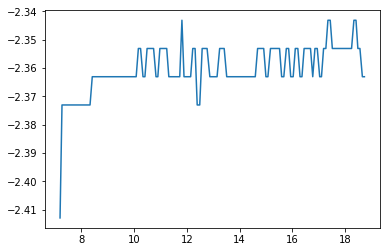

-437.8531492112014
-2.360180594527311


In [45]:
process("../datapull2/elevator-0.2-2018-6-12.csv", 30, 169)

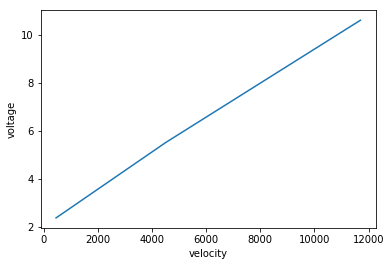

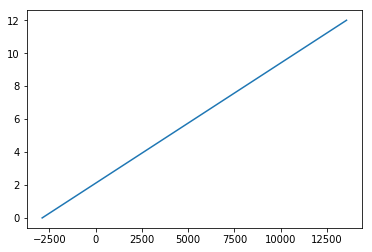

Ks: 2.1038461538461535
Kv: 0.0007296373296373297


In [64]:
velocities = [11700, 4500, 450]
voltages = [10.6, 5.5, 2.36]

plt.plot(velocities, voltages)
plt.xlabel('velocity')
plt.ylabel('voltage')
plt.show()

x=stats.linregress(velocities, voltages)
Ks = x.intercept
Kv = x.slope
voltages2 = numpy.linspace(0, 12, 20)
velocities2 = (voltages2 - Ks ) / Kv
plt.plot(velocities2, voltages2)
plt.show()
print("Ks: %s" % (Ks,))
print("Kv: %s" % (Kv,))

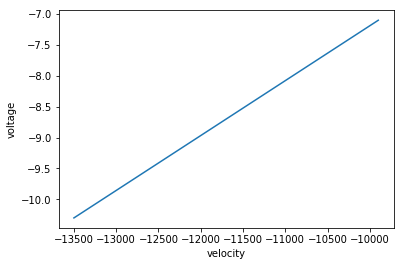

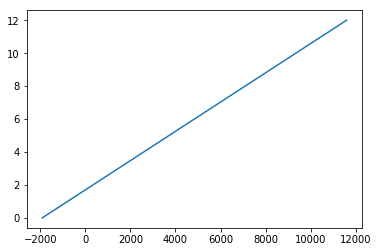

Ks: 1.7000000000000046
Kv: 0.0008888888888888891


In [14]:
velocities = [-13500, -9900]
voltages = [-10.3, -7.1]

plt.plot(velocities, voltages)
plt.xlabel('velocity')
plt.ylabel('voltage')
plt.show()

x=stats.linregress(velocities, voltages)
Ks = x.intercept
Kv = x.slope
voltages2 = numpy.linspace(0, 12, 20)
velocities2 = (voltages2 - Ks ) / Kv
plt.plot(velocities2, voltages2)
plt.show()
print("Ks: %s" % (Ks,))
print("Kv: %s" % (Kv,))

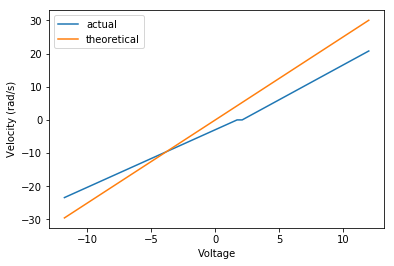

In [19]:
voltages1 = numpy.linspace(2.10, 12, 50)
velocities1 =  (voltages1 - 2.10) / 0.476
voltages2 = [1.7, 2.1]
velocities2 = [0, 0]
voltages3 = numpy.linspace(-11.8, 0, 50)
velocities3 = (voltages3 - 1.7) / 0.576
plt.plot(numpy.concatenate((voltages3,voltages2, voltages1)), numpy.concatenate((velocities3, velocities2, velocities1)))
voltages4 = numpy.linspace(-11.8, 12, 50)
velocities4 = voltages4 / 0.399
plt.plot(voltages4, velocities4)
plt.xlabel("Voltage")
plt.ylabel("Velocity (rad/s)")
plt.legend(["actual", "theoretical"])
plt.show()

In [5]:
numpy.concatenate(([1,2],[3]))

array([1, 2, 3])

In [98]:
from frc3223_azurite.conversions import *
from frc3223_azurite import motors

def winch_speed(N, Ng, V, M, r, motor):
    g_torque = r * M * g
    gt_per_motor = g_torque / N / Ng
    stall_torque = float(motor.stall_torque) * V / motor.spec_voltage
    free_speed = float(motor.free_speed) * V / motor.spec_voltage
    motor_speed = (stall_torque - gt_per_motor) * free_speed / stall_torque
    _winch_speed = motor_speed / Ng
    motor_current = motor.current_at_torque(gt_per_motor)
    print('%s %s motors, Ng=%s, V=%.2f, M=%.2f kg, r=%.3f m:' % (N, motor.name, Ng, V, M, r))
    print(' %.2f rad/s' %  (_winch_speed,))
    print(' %.2f m/s' %  (_winch_speed * r,))
    print(' %.2f A' % (motor_current,))
    return _winch_speed

In [99]:
winch_speed(4, 50, V=10.7, M=lbs_to_kg(16), r=inch_to_meter(2.12), motor=motors.bag)
winch_speed(4, 50, V=10.7, M=lbs_to_kg(32), r=inch_to_meter(2.12), motor=motors.bag)
winch_speed(4, 50, V=10.7, M=lbs_to_kg(64), r=inch_to_meter(2.12), motor=motors.bag)
winch_speed(4, 50, V=10.7, M=lbs_to_kg(100), r=inch_to_meter(2.12), motor=motors.bag)


4 bag motors, Ng=50, V=10.70, M=7.26 kg, r=0.054 m:
 24.74 rad/s
 1.33 m/s
 1.96 A
4 bag motors, Ng=50, V=10.70, M=14.52 kg, r=0.054 m:
 23.33 rad/s
 1.26 m/s
 3.93 A
4 bag motors, Ng=50, V=10.70, M=29.03 kg, r=0.054 m:
 20.52 rad/s
 1.11 m/s
 7.86 A
4 bag motors, Ng=50, V=10.70, M=45.36 kg, r=0.054 m:
 17.36 rad/s
 0.93 m/s
 12.28 A


17.362731693702763

In [100]:
winch_speed(4, 50, V=1.22, M=lbs_to_kg(2), r=inch_to_meter(2.12), motor=motors.bag)
winch_speed(4, 50, V=1.22, M=lbs_to_kg(16), r=inch_to_meter(2.12), motor=motors.bag)
winch_speed(4, 50, V=1.22, M=lbs_to_kg(32), r=inch_to_meter(2.12), motor=motors.bag)
winch_speed(4, 50, V=1.22, M=lbs_to_kg(64), r=inch_to_meter(2.12), motor=motors.bag)
winch_speed(4, 50, V=1.22, M=lbs_to_kg(100), r=inch_to_meter(2.12), motor=motors.bag)

4 bag motors, Ng=50, V=1.22, M=0.91 kg, r=0.054 m:
 2.81 rad/s
 0.15 m/s
 0.25 A
4 bag motors, Ng=50, V=1.22, M=7.26 kg, r=0.054 m:
 1.58 rad/s
 0.08 m/s
 1.96 A
4 bag motors, Ng=50, V=1.22, M=14.52 kg, r=0.054 m:
 0.17 rad/s
 0.01 m/s
 3.93 A
4 bag motors, Ng=50, V=1.22, M=29.03 kg, r=0.054 m:
 -2.64 rad/s
 -0.14 m/s
 7.86 A
4 bag motors, Ng=50, V=1.22, M=45.36 kg, r=0.054 m:
 -5.80 rad/s
 -0.31 m/s
 12.28 A


-5.801278138765979

In [101]:
winch_speed(4, 50, V=10.4, M=lbs_to_kg(10), r=inch_to_meter(2.12), motor=motors.bag)
winch_speed(4, 50, V=10.4, M=lbs_to_kg(20), r=inch_to_meter(2.12), motor=motors.bag)
winch_speed(4, 50, V=10.4, M=lbs_to_kg(30), r=inch_to_meter(2.12), motor=motors.bag)

4 bag motors, Ng=50, V=10.40, M=4.54 kg, r=0.054 m:
 24.53 rad/s
 1.32 m/s
 1.23 A
4 bag motors, Ng=50, V=10.40, M=9.07 kg, r=0.054 m:
 23.66 rad/s
 1.27 m/s
 2.46 A
4 bag motors, Ng=50, V=10.40, M=13.61 kg, r=0.054 m:
 22.78 rad/s
 1.23 m/s
 3.68 A


22.777303758685754

In [113]:
winch_speed(2, 12, V=10.7, M=lbs_to_kg(60), r=inch_to_meter(2.12), motor=motors.cim)
winch_speed(2, 12, V=10.7, M=lbs_to_kg(100), r=inch_to_meter(2.12), motor=motors.cim)
winch_speed(2, 15, V=10.7, M=lbs_to_kg(80), r=inch_to_meter(2.12), motor=motors.cim)

2 cim motors, Ng=12, V=10.70, M=27.22 kg, r=0.054 m:
 29.74 rad/s
 1.60 m/s
 33.06 A
2 cim motors, Ng=12, V=10.70, M=45.36 kg, r=0.054 m:
 22.08 rad/s
 1.19 m/s
 55.10 A
2 cim motors, Ng=15, V=10.70, M=36.29 kg, r=0.054 m:
 23.18 rad/s
 1.25 m/s
 35.26 A


23.1823702718716

In [103]:
winch_speed(4, 50, V=10.7, M=lbs_to_kg(100), r=inch_to_meter(1.12), motor=motors.bag)
winch_speed(4, 40, V=10.7, M=lbs_to_kg(100), r=inch_to_meter(1.12), motor=motors.bag)

4 bag motors, Ng=50, V=10.70, M=45.36 kg, r=0.028 m:
 21.51 rad/s
 0.61 m/s
 6.49 A
4 bag motors, Ng=40, V=10.70, M=45.36 kg, r=0.028 m:
 25.43 rad/s
 0.72 m/s
 8.11 A


25.431749735550653